1. Logistic回归实现

In [5]:
from numpy import *

def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('testSet_Logistic.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

def sigmoid(inX):
    '''
    输入：sigmoid函数的输入值
    输出：sigmoid函数输出结果
    描述：sigmoid函数实现
    '''
    return 1.0/(1.0+exp(-inX))

def gradAscent(dataMatIn, classLabels):
    '''
    输入：数据集，对应数据的类标签
    输出：回归系数
    描述：批量梯度上升法实现
    '''
    dataMatrix = mat(dataMatIn)             #转为NumPy矩阵
    labelMat = mat(classLabels).transpose() #转为NumPy矩阵
    m,n = shape(dataMatrix)      #得到数据集 行数（样本数）和 列数（特征数)
    alpha = 0.001                #梯度上升法迭代式中的 迭代步长                    
    maxIter = 500                #最大迭代次数
    weights = ones((n,1))        #将回归系数各分量初始化为1
    for k in range(maxIter):                
        h = sigmoid(dataMatrix*weights)     #得到sigmoid的输出值
        error = (labelMat - h)              #使用向量减法计算误差
        weights = weights + alpha * dataMatrix.transpose()* error #梯度上升法迭代式实现
    return weights

1.1 使用梯度上升找到最佳参数

In [10]:
dataArr,labe1Mat=loadDataSet()
gradAscent(dataArr,labe1Mat)

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

1.2 分析数据：画出决策边界

In [ ]:
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat,labelMat=loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0] 
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()

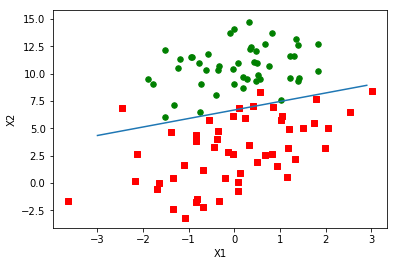

In [12]:
weights=gradAscent(dataArr, labe1Mat)
plotBestFit(weights.getA())

1.3 训练算法：随机梯度上升

In [13]:
def stocGradAscent0(dataMatrix, classLabels):
    '''
    输入：数据集，对应数据的类标签
    输出：回归系数
    描述：随机梯度上升法实现
    '''
    m,n = shape(dataMatrix)  #得到数据集 行数（样本数）和 列数（特征数)
    alpha = 0.01             #梯度上升法迭代式中的 迭代步长   
    weights = ones(n)        #将回归系数各分量初始化为1
    for i in range(m):       #对于所有数据样本
        h = sigmoid(sum(dataMatrix[i]*weights))            #得到sigmoid的输出值
        error = classLabels[i] - h                         #使用向量减法计算误差
        weights = weights + alpha * error * dataMatrix[i]  #梯度上升法迭代式实现
    return weights

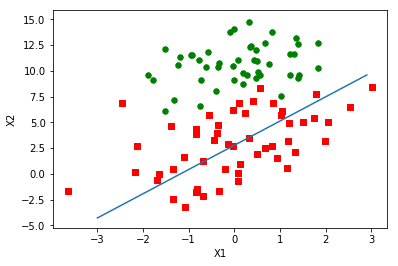

In [14]:
dataArr,labe1Mat=loadDataSet()
weights=stocGradAscent0(array(dataArr),labe1Mat)
plotBestFit(weights)

1.4 改进的随机梯度上升算法

In [15]:
def stocGradAscent1(dataMatrix, classLabels, maxIter=150):
    '''
    输入：数据集，对应数据的类标签
    输出：回归系数
    描述：stocGradAscent0函数的改进版本，降低了结果的
    周期性波动，提高了结果的收敛速度
    注：相对stocGradAscent0改进的部分用
    '''
    m,n = shape(dataMatrix)  #得到数据集 行数（样本数）和 列数（特征数)
    weights = ones(n)        #将回归系数各分量初始化为1
    for j in range(maxIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.0001 #【改进1】：alpha在每次迭代都会调整，会一定程度上缓解
                                       #结果的周期性波动。同时，由于常数项的存在，虽然alpha会
                                       #随着迭代次数不断减少，但永远都不会减少到 0。这保证了多
                                       #次迭代后新数据仍然会有影响
            randIndex = int(random.uniform(0,len(dataIndex)))#【改进2】：随机选取样本更新回归系数
                                                             #也可缓解结果的周期性波动
            h = sigmoid(sum(dataMatrix[randIndex]*weights))            #得到sigmoid的输出值
            error = classLabels[randIndex] - h                         #使用向量减法计算误差
            weights = weights + alpha * error * dataMatrix[randIndex]  #梯度上升法迭代式实现
            del(dataIndex[randIndex])  #将随机选择的样本从数据集中删除，避免影响下一次迭代
    return weights

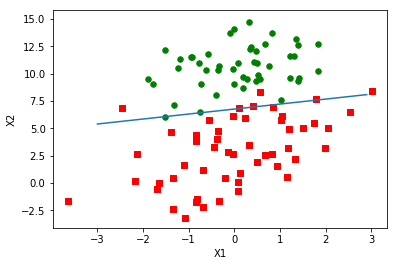

In [16]:
dataArr,labe1Mat=loadDataSet()
weights=stocGradAscent1(array(dataArr),labe1Mat)
plotBestFit(weights)

2、从疝气病症预测病马的死亡率

2.1 利用Logistic回归分类

In [17]:
def classifyVector(inX, weights):
    '''
    输入：样本数据，回归系数
    输出：分类结果（0 或 1）
    描述：使用优化后的回归系数对数据进行分类
    '''
    prob = sigmoid(sum(inX*weights)) #计算sigmoid函数输出结果
    if prob > 0.5: return 1.0
    else: return 0.0

def colicTest():
    frTrain = open('horseColicTraining.txt')#打开训练集文件
    frTest = open('horseColicTest.txt')     #打开测试集文件
    #将训练集数据和对应标签存放到trainingSet和trainingLabels中
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    #训练算法，得到回归系数trainWeights
    trainWeights = stocGradAscent1(array(trainingSet), trainingLabels, 1000)
    #每行读取测试集数据，使用回归系数得到分类结果
    errorCount = 0; numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        #若分类结果不一致，则errorCount加一
        if int(classifyVector(array(lineArr), trainWeights))!= int(currLine[21]):
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec)
    #打印此次测试的错误率
    print ("the error rate of this test is: %f" % errorRate)
    return errorRate

def multiTest(numTests=10):
    errorSum=0.0
    for k in range(numTests):
        errorSum += colicTest()
    print ("after %d iterations,the average error rate is: %f" % (numTests, errorSum/float(numTests)))

In [18]:
multiTest()

e:\python\py36\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp


the error rate of this test is: 0.358209
the error rate of this test is: 0.388060
the error rate of this test is: 0.373134
the error rate of this test is: 0.343284
the error rate of this test is: 0.402985
the error rate of this test is: 0.268657
the error rate of this test is: 0.417910
the error rate of this test is: 0.328358
the error rate of this test is: 0.298507
the error rate of this test is: 0.343284
after 10 iterations,the average error rate is: 0.352239
